качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [6]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [8]:
pr1_m=np.mean(product1)
pr2_m=np.mean(product2)

In [11]:
pr1_med=np.median(product1)
pr2_med=np.median(product2)

In [12]:
pr1_mode=statistics.mode(product1)
pr2_mode=statistics.mode(product2)

In [14]:
print(pr1_m,pr2_m)
print(pr1_med,pr2_med)
print(pr1_mode,pr2_mode)

199.103 193.5
198.5 194.5
186 227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

ответ-Среднее может быть менее показательной метрикой в данном случае, так как среднее чувствительно к выбросам и может быть искажено

ответ-Продукт 2 с медианой 194.5 и модой 227 в среднем приносит больше выручки, так как его значения находятся ближе к центру распределения, а значит, и среднее значение будет выше

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [16]:
pr1_std=np.std(product1, ddof=1)
pr2_std=np.std(product2, ddof=1)
print(pr1_std, pr2_std)
#оценка продукта 2 более точна, так как близка к 30 

28.808372278095014 29.738082240681482


**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

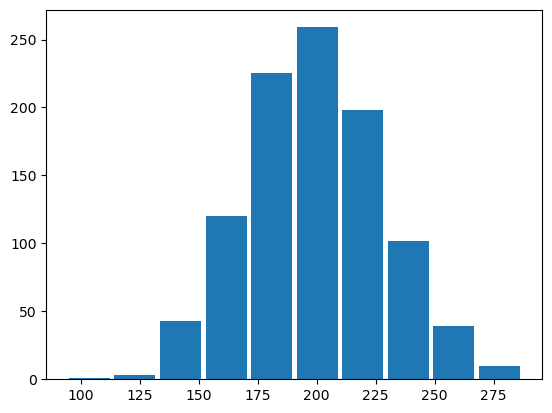

In [28]:
plt.hist(product1,rwidth=0.9)
plt.title('Product1')
plt.show()

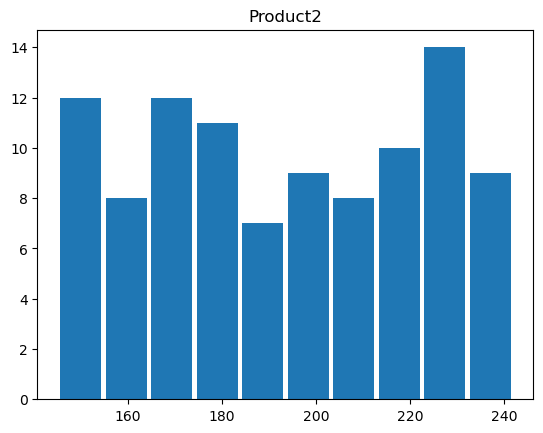

In [29]:
plt.hist(product2, rwidth=0.9)
plt.title('Product2')
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [31]:
min1=min(product1)
max1=max(product1)
print(max1-min1)

193


In [32]:
min2=min(product2)
max2=max(product2)
print(max2-min2)

97


Причина различий в стандартных отклонениях может быть связана с наличием выбросов, неравномерностью распределения данных или различиями в изменчивости между выборками. 

**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [34]:
q1=np.percentile(product1,25)
q3=np.percentile(product1,75)
iqr1=q3-q1
iqr1

38.25

In [36]:
q_1=np.percentile(product2,25)
q_3=np.percentile(product2,75)
iqr2=q_3-q_1
iqr2

51.0

In [41]:
lb1 = q1 - 1.5 * iqr1
ub1= q3 + 1.5 * iqr1
print(lb1,ub1)

121.625 274.625


In [40]:
lb2 = q_1 - 1.5 * iqr2
ub2= q_3 + 1.5 * iqr2
print(lb2,ub2)

93.5 297.5


ответ-После удаления выбросов можно ожидать, что разброс данных уменьшится

**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

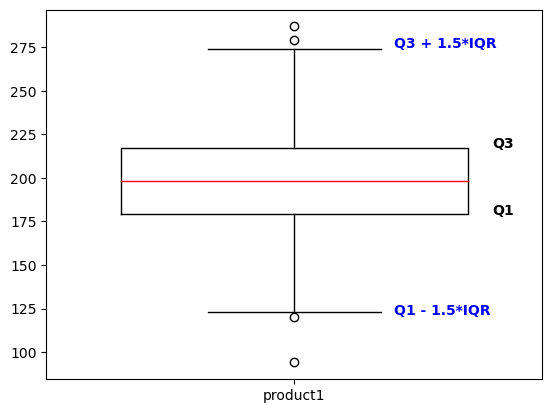

In [52]:
plt.boxplot(product1,widths=0.7,medianprops={'color':'red'})
plt.text(1.4, q1, 'Q1', fontsize=10, color='black', fontweight='bold')
plt.text(1.4, q3, 'Q3', fontsize=10, color='black', fontweight='bold')
plt.text(1.2, q1 - 1.5*iqr1, 'Q1 - 1.5*IQR', fontsize=10, color='blue', fontweight='bold')
plt.text(1.2, q3 + 1.5*iqr1, 'Q3 + 1.5*IQR', fontsize=10, color='blue', fontweight='bold')
plt.xticks([1],['product1'])
plt.show()

ответ:lower bound - 122, upper bound - 275

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

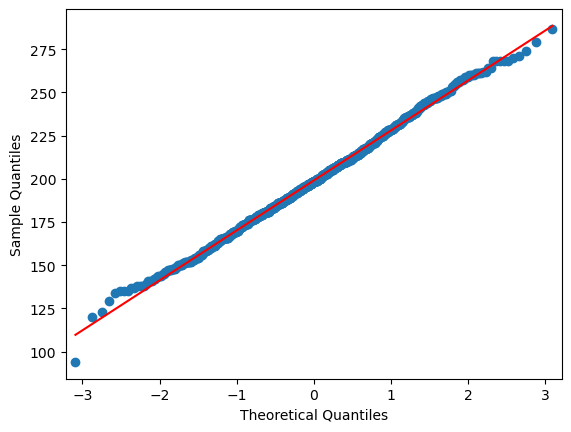

In [53]:
sm.qqplot(np.array(product1), line='r')
plt.show()

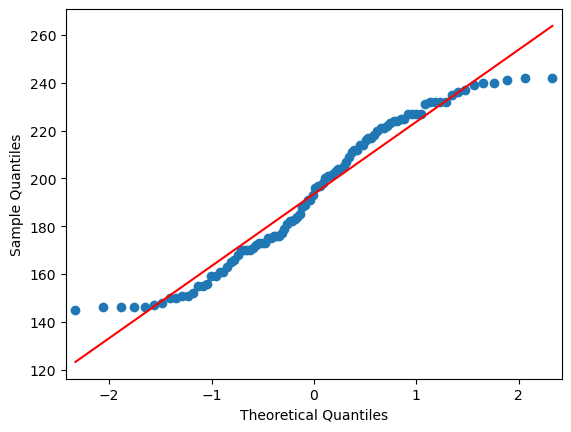

In [54]:
sm.qqplot(np.array(product2), line='r')
plt.show()

ответ: данные в продукт1 распределены 'нормально',  т.е вдоль красной линии

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

ответ:в продукте2 много тех значений которые над линией и мало тех которые под линией 

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [74]:
np.random.seed(105)
st_normal_sample=np.random.normal(pr1_m,pr1_std, len(product1))

Нарисуйте kdeplot нового стандартного распределения

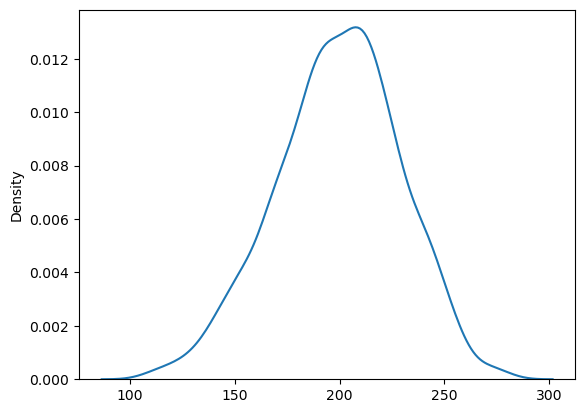

In [75]:
sns.kdeplot(st_normal_sample)
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [76]:
quantile_1 = np.percentile(st_normal_sample, 1)
quantile_1

127.02292403254182

Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

ответ:Это указывает на то, что значение 94 в вашем списке продукта 1 скорее всего является выбросом или крайне низким значением относительно основного распределения данных

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [88]:
pr2_sample=np.random.normal(pr2_m,pr2_std, len(product2))
np.mean(pr2_sample)

194.24992169599253

Подсчитайте 95% доверительный интервал

In [79]:
ul=norm.ppf(0.95,pr2_m,pr2_std)
ll=norm.ppf(0.05,pr2_m,pr2_std)
print(ul, ll)

242.4147924321661 144.5852075678339


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [91]:
from scipy import stats

alpha = 0.05
t_statistic, p_value = stats.ttest_1samp(product1, 197.5)

print("T-статистика:", t_statistic)
print("P-значение:", p_value)

T-статистика: 1.7596034376105127
P-значение: 0.07878111924868997


Какой это был типа АБ теста?

ответ:односторонний тип теста

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [92]:
alpha = 0.05

t_statistic, p_value = stats.ttest_ind(product1, product2)

print("T-статистика:", t_statistic)
print("P-значение:", p_value)

T-статистика: 1.8489503287555282
P-значение: 0.06473365137046305
